In [5]:
import time
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [6]:
dataset = datasets.load_wine()

X = dataset.data[:, :2]
y = dataset.target

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 0)
print (f"training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples")


training set size: 133 samples 
test set size: 45 samples


In [8]:
#i was trying to plot the data when i used only two features of the data set
def plot_data(features, labels):
    f, ax = plt.subplots(1, 1)
    ax.scatter(features[labels == 0, 0], features[labels == 0, 1], color="#d00000", label="class 0")
    ax.scatter(features[labels == 1, 0], features[labels == 1, 1], color="#0000d0", label="class 1")
    ax.scatter(features[labels == 2, 0], features[labels == 2, 1], color="#00d000", label="class 2")
    ax.set_xlabel("Alcohol")
    ax.set_ylabel("Malic acid")
    ax.legend()
    f.set_size_inches(16, 6)
    ax.set_title("wine data Type (training set)")
    plt.show()

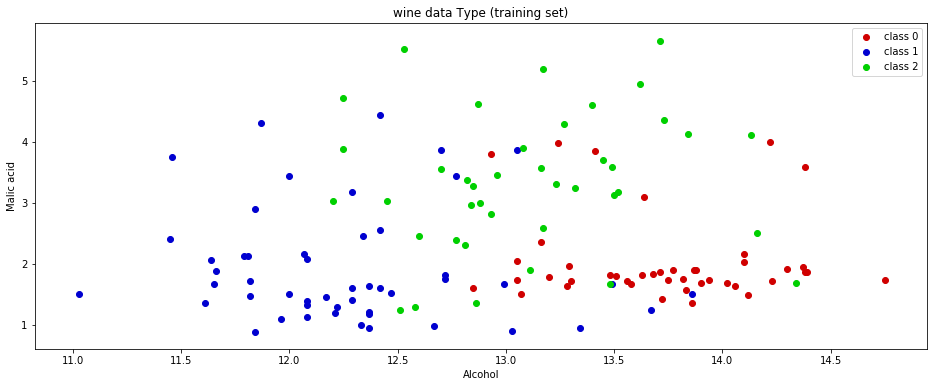

In [7]:
#plot_data(X_train, y_train)

In [43]:
#applying knn with K=5
from sklearn.neighbors import KNeighborsClassifier
time_start=time.perf_counter()

neighborhood_size = 5
time_start=time.perf_counter()
classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", algorithm = "brute")
classifier.fit(X_train, y_train)
time_end=time.perf_counter()
t_diff=time_end-time_start

train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)
print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%,Testing Accuracy: {test_accuracy*100:.2f}, Training time= {t_diff}")


Neighborhood size (k) = 5, Training accuracy: 82.7%,Testing Accuracy: 84.44, Training time= 0.0012223999947309494


In [198]:
#applying knn with K=7
from sklearn.neighbors import KNeighborsClassifier

neighborhood_size = 7
time_start=time.perf_counter()
classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", algorithm = "brute")
classifier.fit(X_train, y_train)
time_end=time.perf_counter()
t_diff=time_end-time_start
train_accuracy = classifier.score(X_train, y_train)

test_accuracy = classifier.score(X_test, y_test)
print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%,Testing Accuracy: {test_accuracy*100:.2f}, Training time= {t_diff}")
#incrasing the value of K increased the acurracy of testing, however, it did not affect the training accuracy

Neighborhood size (k) = 7, Training accuracy: 82.7%,Testing Accuracy: 88.89, Training time= 0.0015605999942636117


In [44]:
#applying knn with K=11
from sklearn.neighbors import KNeighborsClassifier

neighborhood_size = 11
time_start=time.perf_counter()
classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", algorithm = "brute")
classifier.fit(X_train, y_train)
time_end=time.perf_counter()
t_diff=time_end-time_start

train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)
print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%,Testing Accuracy: {test_accuracy*100:.2f}, Training time= {t_diff}")
# increasing the k to 11 decreased both the training accuracy and testing accuracy

Neighborhood size (k) = 11, Training accuracy: 81.2%,Testing Accuracy: 86.67, Training time= 0.0008191999950213358


In [173]:
#applying knn with K=3
from sklearn.neighbors import KNeighborsClassifier

neighborhood_size = 3
time_start=time.perf_counter()
classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", algorithm = "brute")
classifier.fit(X_train, y_train)
time_end=time.perf_counter()
t_diff=time_end-time_start
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)
print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%,Testing Accuracy: {test_accuracy*100:.2f}, Training time= {t_diff}")
#decrasing the K to 3 increased the traning accuracy, but decreased the testing accuracy (kind of overfitting)

Neighborhood size (k) = 3, Training accuracy: 85.0%,Testing Accuracy: 82.22, Training time= 0.0006759999996575061


In [210]:
#implementing NaiveBaise
from sklearn.naive_bayes import GaussianNB

## write your code here
time_start=time.perf_counter()

classifier = GaussianNB()
classifier.fit(X_train, y_train)
time_end=time.perf_counter()
t_diff=time_end-time_start

train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#using the naive base reached the best accuracy I tried with knn classifier when I used K= 11 in almost same average training time

Training Accuracy: 81.20, Testing Accuracy: 86.67,Training time= 0.0023286000068765134


In [90]:
#implementing SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="rbf", gamma=1, C=1)#rbf:Radial basis function kernel

svm.fit(X,y)
time_end=time.perf_counter()

t_diff=time_end-time_start
#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#the svm is so accurate in testing accuracy, when using kernel=rbf and gamma=1 c=1, however, it did not increase the training accuracy so much with average time higher than the previous average time of the previous classifiers(knn and naive)

Training Accuracy: 81.95, Testing Accuracy: 91.11,Training time= 0.0019762000010814518


In [97]:
#implementing SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="linear", gamma=1, C=1)#rbf:Radial basis function kernel
svm.fit(X,y)
time_end=time.perf_counter()

t_diff=time_end-time_start
#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#using the same c, and gamma but changing the kernel to linear decreased both testing and training accuracy tp 77.78 and 78.20 in order.

Training Accuracy: 78.20, Testing Accuracy: 77.78,Training time= 0.0012889999925391749


In [101]:
#implementing SVM after changing gamma
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="linear", gamma=.5, C=1)#rbf:Radial basis function kernel
svm.fit(X,y)
time_end=time.perf_counter()

t_diff=time_end-time_start
#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#changing gamma to .5 while having kernel lnear and c=1 maintained the same accuracy

Training Accuracy: 78.20, Testing Accuracy: 77.78,Training time= 0.0011814000026788563


In [107]:
#implementing SVM after changing keernel
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="rbf", gamma=.5, C=1)#rbf:Radial basis function kernel
svm.fit(X,y)
time_end=time.perf_counter()

t_diff=time_end-time_start
#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#changing the kernel to rbf for the same gamma and c increased both the training and testing accuracy

Training Accuracy: 81.20, Testing Accuracy: 91.11,Training time= 0.0023132999922381714


In [109]:
#implementing SVM after changing C
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="linear", gamma=.5, C=.1)#rbf:Radial basis function kernel
svm.fit(X,y)
time_end=time.perf_counter()
t_diff=time_end-time_start

#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#changing the C, gamma to .1 and .5 in linear kernel had training accuracy and testing accuracy of 78.95 and 82.22.

Training Accuracy: 78.95, Testing Accuracy: 82.22,Training time= 0.0011971999920206144


In [131]:
#implementing SVM after changing the kernel
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="rbf", gamma=.5, C=.1)#rbf:Radial basis function kernel
svm.fit(X,y)
time_end=time.perf_counter()
t_diff=time_end-time_start
#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#changing the kernel to rbf while having the same pervious gamma and c decreased the training accuracy little, but increased the testing set 

Training Accuracy: 78.20, Testing Accuracy: 88.89,Training time= 0.0025085999950533733


In [124]:
#implementing SVM after changing C
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="rbf", gamma=500, C=250)#rbf:Radial basis function kernel
svm.fit(X,y)
time_end=time.perf_counter()
t_diff=time_end-time_start
#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")



Training Accuracy: 100.00, Testing Accuracy: 100.00,Training time= 0.0030240000050980598


In [117]:
#applying dst
from sklearn.tree import DecisionTreeClassifier

time_start=time.perf_counter()
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train, y_train)
time_end=time.perf_counter()

train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#reached training accuracy of 100%, however testing accuracy is 80% which means that it's overfitting. Moreover, the time is relatively long, so dst is the worst to be used in this case

Training Accuracy: 100.00, Testing Accuracy: 80.00,Training time= 0.004777399997692555


In [ ]:
#there was no need to do high computations power as  in svc knn and naive bayes already reached high testing accuracy of  88.89% and 
#86.67% in order which is very high in wine classifications

In [132]:
#applying the previous steps but in all the features instead of only two features
X_all = dataset.data[:, :]
y_all = dataset.target

#split the data into train and test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size = 0.25, shuffle = True, random_state = 0)

In [155]:
#applying knn with K=5
from sklearn.neighbors import KNeighborsClassifier

neighborhood_size = 5
time_start=time.perf_counter()

classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", algorithm = "brute")
classifier.fit(X_train_all, y_train_all)
time_end=time.perf_counter()

train_accuracy = classifier.score(X_train_all, y_train_all)
test_accuracy = classifier.score(X_test_all, y_test_all)
print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%,Testing Accuracy: {test_accuracy*100:.2f}, Training time= {t_diff}")


Neighborhood size (k) = 5, Training accuracy: 78.9%,Testing Accuracy: 73.33, Training time= 0.000789400000940077


In [152]:
from sklearn.neighbors import KNeighborsClassifier

neighborhood_size = 7
time_start=time.perf_counter()
classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", algorithm = "brute")
classifier.fit(X_train_all, y_train_all)
time_end=time.perf_counter()
t_diff=time_end-time_start
train_accuracy = classifier.score(X_train_all, y_train_all)

test_accuracy = classifier.score(X_test_all, y_test_all)
print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%,Testing Accuracy: {test_accuracy*100:.2f}, Training time= {t_diff}")
#increasing k to 7 decreased the training accuracy. however, it increased the testing accuracy

Neighborhood size (k) = 7, Training accuracy: 78.2%,Testing Accuracy: 77.78, Training time= 0.000789400000940077


In [159]:
#applying knn with K=11
from sklearn.neighbors import KNeighborsClassifier

neighborhood_size = 11
time_start=time.perf_counter()
classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", algorithm = "brute")
classifier.fit(X_train_all, y_train_all)
time_end=time.perf_counter()
t_diff=time_end-time_start

train_accuracy = classifier.score(X_train_all, y_train_all)
test_accuracy = classifier.score(X_test_all, y_test_all)
print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%,Testing Accuracy: {test_accuracy*100:.2f}, Training time= {t_diff}")
# increasing the k to 11 decreased both the training accuracy and testing accuracy

Neighborhood size (k) = 11, Training accuracy: 74.4%,Testing Accuracy: 68.89, Training time= 0.00036959999124519527


In [160]:
#applying knn with K=3
from sklearn.neighbors import KNeighborsClassifier

neighborhood_size = 3
time_start=time.perf_counter()
classifier = KNeighborsClassifier(n_neighbors = neighborhood_size, weights = "uniform", algorithm = "brute")
classifier.fit(X_train_all, y_train_all)
time_end=time.perf_counter()
t_diff=time_end-time_start
train_accuracy = classifier.score(X_train_all, y_train_all)
test_accuracy = classifier.score(X_test_all, y_test_all)
print (f"Neighborhood size (k) = {neighborhood_size}, Training accuracy: {train_accuracy*100:.1f}%,Testing Accuracy: {test_accuracy*100:.2f}, Training time= {t_diff}")
#decreasing k into 3 increased the training accuracy, but decreased the testing accuracy

Neighborhood size (k) = 3, Training accuracy: 88.7%,Testing Accuracy: 73.33, Training time= 0.0014016999921295792


In [211]:
#implementing NaiveBaise
from sklearn.naive_bayes import GaussianNB


time_start=time.perf_counter()

classifier = GaussianNB()
classifier.fit(X_train_all, y_train_all)
time_end=time.perf_counter()
t_diff=time_end-time_start

train_accuracy = classifier.score(X_train_all, y_train_all)
test_accuracy = classifier.score(X_test_all, y_test_all)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#naivebaise is better when the dimensions is so high

Training Accuracy: 98.50, Testing Accuracy: 93.33,Training time= 0.8237845000112429


In [162]:
#implementing SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="rbf", gamma=1, C=1)#rbf:Radial basis function kernel

svm.fit(X_all,y_all)
time_end=time.perf_counter()

t_diff=time_end-time_start
#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train_all, y_train_all)
test_accuracy = svm.score(X_test_all, y_test_all)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")


Training Accuracy: 100.00, Testing Accuracy: 100.00,Training time= 0.00547750000259839


In [163]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="linear", gamma=1, C=1)#rbf:Radial basis function kernel
svm.fit(X_all,y_all)
time_end=time.perf_counter()

t_diff=time_end-time_start
#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train_all, y_train_all)
test_accuracy = svm.score(X_test_all, y_test_all)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#this is overfitting as the training accuracy reached 100%, but the testing accuracy decreased from rbf kernel

Training Accuracy: 100.00, Testing Accuracy: 97.78,Training time= 0.05700500000966713


In [164]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="linear", gamma=.5, C=1)#rbf:Radial basis function kernel
svm.fit(X_all,y_all)
time_end=time.perf_counter()

t_diff=time_end-time_start
#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train_all, y_train_all)
test_accuracy = svm.score(X_test_all, y_test_all)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#changing gamma to .5 did not affect neither the training accuracy nor the testing accuracy

Training Accuracy: 100.00, Testing Accuracy: 97.78,Training time= 0.05865119998634327


In [169]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="rbf", gamma=.5, C=1)#rbf:Radial basis function kernel
svm.fit(X_all,y_all)
time_end=time.perf_counter()

t_diff=time_end-time_start
#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train_all, y_train_all)
test_accuracy = svm.score(X_test_all, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#changing the prvious case of kernel to be rbf reached 100% training and accuracy test


Training Accuracy: 100.00, Testing Accuracy: 100.00,Training time= 0.00429959999746643


In [170]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="linear", gamma=.5, C=.1)#rbf:Radial basis function kernel
svm.fit(X_all,y_all)
time_end=time.perf_counter()
t_diff=time_end-time_start

#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train_all, y_train_all)
test_accuracy = svm.score(X_test_all, y_test_all)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#changing c to .1 while had training accuracy of 97.74 and testing accuracy of 97.78

Training Accuracy: 97.74, Testing Accuracy: 97.78,Training time= 0.04694949999975506


In [184]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="rbf", gamma=.5, C=.1)#rbf:Radial basis function kernel
svm.fit(X_all,y_all)
time_end=time.perf_counter()
t_diff=time_end-time_start
#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train_all, y_train_all)
test_accuracy = svm.score(X_test_all, y_test_all)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#changing both c and gamma when kernel is rbf was very low in accuracy having training accuracy of 37.59 and testing of 46.67

Training Accuracy: 37.59, Testing Accuracy: 46.67,Training time= 0.0044793999986723065


In [178]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
time_start=time.perf_counter()

svm = SVC(kernel="rbf", gamma=500, C=250)#rbf:Radial basis function kernel
svm.fit(X_all,y_all)
time_end=time.perf_counter()
t_diff=time_end-time_start
#plot_classifier(X, y, svm)
train_accuracy = svm.score(X_train_all, y_train_all)
test_accuracy = svm.score(X_test_all, y_test_all)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#increasing c and gamma while having rbf kernel reached accuracy of 100% to both training and testing

Training Accuracy: 100.00, Testing Accuracy: 100.00,Training time= 0.006502699994598515


In [185]:
#applying dst
from sklearn.tree import DecisionTreeClassifier

time_start=time.perf_counter()
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train_all, y_train_all)
time_end=time.perf_counter()

train_accuracy = classifier.score(X_train_all, y_train_all)
test_accuracy = classifier.score(X_test_all, y_test_all)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f},Training time= {t_diff}")
#dst reached training accuracy of 100%, but testing accuracy of 93.33

Training Accuracy: 100.00, Testing Accuracy: 93.33,Training time= 0.0044793999986723065


In [ ]:
#naive fits very well when we used the whole features of the data sets and reached high testing accuracy which is more than 90%, so 
#it is the best classifier to be used in this case